### Análise de Prestação de Contas Partidárias de Eleições Estaduais

In [1]:
# Importação das libs
import locale
import copy
from locale import atof
import electionsBR as api
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
# Ajuste de formatação
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
pd.set_option("float_format", locale.currency)


In [3]:
# Leitura dos dados dos bens declarados para um determinado cargo (presidente, governador, senador, deputado federal, deputado estadual, prefeito, vereador)

elections2010 = api.get_assets(year=2010, position="governador")
elections2014 = api.get_assets(year=2014, position="governador")
elections2018 = api.get_assets(year=2018, position="governador")


In [4]:
# Filtro para exibir registros (contém todas as colunas) onde a 'SIGLA_UF' seja apenas 'SP' ou 'RJ' e DESCRICAO_CARGO seja 'GOVERNADOR'

filter_elections2010 = elections2010[(elections2010["DESCRICAO_CARGO"] == "GOVERNADOR")]
filter_elections2014 = elections2014[(elections2014["DESCRICAO_CARGO"] == "GOVERNADOR")]
filter_elections2018 = elections2018[(elections2018["DESCRICAO_CARGO"] == "GOVERNADOR")]


In [5]:
# Exemplo de amostra
filter_elections2010.sample(5)


,DATA_GERACAO,HORA_GERACAO,ANO_ELEICAO,DESCRICAO_ELEICAO,SIGLA_UF,SEQUENCIAL_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DETALHE_BEM,VALOR_BEM,...,ID_CANDIDATO,SIGLA_UE,CODIGO_CARGO,DESCRICAO_CARGO,NUMERO_PARTIDO,SIGLA_PARTIDO,NOME_CANDIDATO,NUMERO_CANDIDATO,CPF_CANDIDATO,NUM_TITULO_ELEITORAL_CANDIDATO
74791,07/11/2018,18:39:09,2010,ELEIÇÕES 2010,SP,250000002541,13,TERRENO,RUA CASTANHEIRO VL MARIA NA SPSP FRAÇÃO IDEAL,"13.444,37",...,6018372,SP,3,GOVERNADOR,43,PV,FABIO JOSÉ FELDMANN,43,01017886814,000037080175
62772,07/11/2018,18:39:08,2010,ELEIÇÕES 2010,SC,240000000148,12,CASA,CASA DE PRAIA,"168.620,00",...,6017796,SC,3,GOVERNADOR,50,PSOL,VALMIR MARTINS,50,02983737934,005045400914
11622,07/11/2018,18:39:01,2010,ELEIÇÕES 2010,DF,70000000051,41,CADERNETA DE POUPANÇA,"POUPANÇA OURO - BANCO DO BRASIL, AG. 1606-3","1.030,80",...,6003647,DF,3,GOVERNADOR,50,PSOL,ANTONIO CARLOS DE ANDRADE,50,41489772715,007543752011
1220,07/11/2018,18:38:59,2010,ELEIÇÕES 2010,AL,20000000059,26,LINHA TELEFÔNICA,"LINHA RESIDENCIAL, CONTRATO N. 0533840","1.110,35",...,6000448,AL,3,GOVERNADOR,14,PTB,FERNANDO AFFONSO COLLOR DE MELLO,14,02906287172,006630471724
14770,07/11/2018,18:39:01,2010,ELEIÇÕES 2010,DF,70000001223,21,"VEÍCULO AUTOMOTOR TERRESTRE: CAMINHÃO, AUTOMÓV...",FORD F250,"93.000,00",...,6003653,DF,3,GOVERNADOR,20,PSC,WESLIAN DO PERPETUO SOCORRO PELES RORIZ,20,26557401149,010284162089


In [6]:
# Exbibe os registros com uma lista de colunas pré-definidas
elections2010.loc[:, ['DATA_GERACAO', 'ANO_ELEICAO', 'DESCRICAO_ELEICAO', 'SIGLA_UF', 'DESCRICAO_CARGO',
                     'SIGLA_PARTIDO', 'NOME_CANDIDATO', 'CPF_CANDIDATO']].sample(5)


,DATA_GERACAO,ANO_ELEICAO,DESCRICAO_ELEICAO,SIGLA_UF,DESCRICAO_CARGO,SIGLA_PARTIDO,NOME_CANDIDATO,CPF_CANDIDATO
37960,07/11/2018,2010,ELEIÇÕES 2010,PB,DEPUTADO FEDERAL,PSDB,JOAO BATISTA FREIRE VIEGAS,10904255468
15638,07/11/2018,2010,ELEIÇÕES 2010,ES,DEPUTADO ESTADUAL,DEM,ANTONIO MOREIRA,09621083753
7842,07/11/2018,2010,ELEIÇÕES 2010,BA,DEPUTADO FEDERAL,PT,LUIZ ALBERTO SILVA DOS SANTOS,07931174534
59825,07/11/2018,2010,ELEIÇÕES 2010,RS,DEPUTADO ESTADUAL,PDT,ELEMAR SAND,24473405087
59669,07/11/2018,2010,ELEIÇÕES 2010,RS,DEPUTADO FEDERAL,PDT,GIOVANI CHERINI,31050778049


In [7]:
# Utiliza o filtro e exibi os primeiros registros com as colunas desejadas e que satisfazem a condição (DESCRICAO_CARGO == 'GOVERNADOR')
filter_elections2010.loc[:, ['DATA_GERACAO', 'ANO_ELEICAO', 'DESCRICAO_ELEICAO', 'SIGLA_UF', 'DESCRICAO_CARGO',
                     'SIGLA_PARTIDO', 'NOME_CANDIDATO', 'CPF_CANDIDATO', 'DETALHE_BEM', 'VALOR_BEM']].head()


,DATA_GERACAO,ANO_ELEICAO,DESCRICAO_ELEICAO,SIGLA_UF,DESCRICAO_CARGO,SIGLA_PARTIDO,NOME_CANDIDATO,CPF_CANDIDATO,DETALHE_BEM,VALOR_BEM
277,07/11/2018,2010,ELEIÇÕES 2010,AC,GOVERNADOR,PT,SEBASTIÃO AFONSO VIANA MACEDO NEVES,09137394215,PARTICIPAÇÃO DE 95% NO CAPITAL SOCIAL DA SOCIE...,"9.500,00"
278,07/11/2018,2010,ELEIÇÕES 2010,AC,GOVERNADOR,PT,SEBASTIÃO AFONSO VIANA MACEDO NEVES,09137394215,CONTA CORRENTE NO BANCO DO BRASIL AGENCIA 4884...,"1.139,98"
279,07/11/2018,2010,ELEIÇÕES 2010,AC,GOVERNADOR,PT,SEBASTIÃO AFONSO VIANA MACEDO NEVES,09137394215,1 IMOVEL RESIDENCIAL SITUADA NA ALAMEDA DAS AC...,"297.185,71"
280,07/11/2018,2010,ELEIÇÕES 2010,AC,GOVERNADOR,PT,SEBASTIÃO AFONSO VIANA MACEDO NEVES,09137394215,VEICULO ECO SPORTE 2008 FINANCIADO PELO DIBENS...,"52.000,00"
281,07/11/2018,2010,ELEIÇÕES 2010,AC,GOVERNADOR,PT,SEBASTIÃO AFONSO VIANA MACEDO NEVES,09137394215,PARTICIPAÇÃO EM 100% NO CAPITAL SOCIAL DA EMPR...,"10.000,00"


In [8]:
# Utiliza o filtro para exibir os últimos registros e as colunas desejadas de acordo com o indice correspondente de cada coluna
filter_elections2010.iloc[:, [0, 2, 3, 4, 15, 17, 18, 20, 8, 9]].tail()


,DATA_GERACAO,ANO_ELEICAO,DESCRICAO_ELEICAO,SIGLA_UF,DESCRICAO_CARGO,SIGLA_PARTIDO,NOME_CANDIDATO,CPF_CANDIDATO,DETALHE_BEM,VALOR_BEM
80817,07/11/2018,2010,ELEIÇÕES 2010,TO,GOVERNADOR,PMDB,CARLOS HENRIQUE AMORIM,21944202153,DISPONIBILIDADE FINANCEIRA,"420.000,00"
80818,07/11/2018,2010,ELEIÇÕES 2010,TO,GOVERNADOR,PMDB,CARLOS HENRIQUE AMORIM,21944202153,SALDO EM C/C JUNTO A CAIXA ECONÔMICA FEDERAL,"5.607,02"
80819,07/11/2018,2010,ELEIÇÕES 2010,TO,GOVERNADOR,PMDB,CARLOS HENRIQUE AMORIM,21944202153,SALDO EM CONTA CONJUNTA JUNTO AO BANCO DO BRASIL,"165.311,56"
80820,07/11/2018,2010,ELEIÇÕES 2010,TO,GOVERNADOR,PMDB,CARLOS HENRIQUE AMORIM,21944202153,SALDO EM CONTA JUNTO AO BANCO BRADESCO S/A,"3.121,49"
80821,07/11/2018,2010,ELEIÇÕES 2010,TO,GOVERNADOR,PMDB,CARLOS HENRIQUE AMORIM,21944202153,FUNDO DE CAPITALIZAÇÃO JUNTO A CAIXA ECONÔMICA...,"19.096,45"


In [9]:
# Concatenação dos dataframes
elections = pd.concat([elections2010, elections2014])
elections = pd.concat([elections, elections2018])
elections.reset_index(inplace=True)


In [10]:
# Exibe o nome de todas as colunas
elections.columns


Index(['index', 'DATA_GERACAO', 'HORA_GERACAO', 'ANO_ELEICAO',
       'DESCRICAO_ELEICAO', 'SIGLA_UF', 'SEQUENCIAL_CANDIDATO',
       'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DETALHE_BEM',
       'VALOR_BEM', 'DATA_ULTIMA_ATUALIZACAO', 'HORA_ULTIMA_ATUALIZACAO',
       'ID_CANDIDATO', 'SIGLA_UE', 'CODIGO_CARGO', 'DESCRICAO_CARGO',
       'NUMERO_PARTIDO', 'SIGLA_PARTIDO', 'NOME_CANDIDATO', 'NUMERO_CANDIDATO',
       'CPF_CANDIDATO', 'NUM_TITULO_ELEITORAL_CANDIDATO'],
      dtype='object')

In [11]:
# Filtro para exibir registros (contém todas as colunas) onde a 'SIGLA_UF' seja apenas 'SP' e 'DESCRICAO_CARGO' seja 'GOVERNADOR'
filter_elections_governors = elections[(elections["SIGLA_UF"] == "SP") & (elections["DESCRICAO_CARGO"] == "GOVERNADOR")]


In [12]:
# Exibe todos os registros e bens declarados de cada candidato ao cargo de Governador de São Paulo nas eleições de 2010, 2014 e 2018
filter_elections_governors.loc[:, ['DATA_GERACAO', 'ANO_ELEICAO', 'DESCRICAO_ELEICAO', 'SIGLA_UF',
                                   'DESCRICAO_CARGO', 'SIGLA_PARTIDO', 'NOME_CANDIDATO', 'CPF_CANDIDATO',
                                   'DETALHE_BEM', 'VALOR_BEM']]


,DATA_GERACAO,ANO_ELEICAO,DESCRICAO_ELEICAO,SIGLA_UF,DESCRICAO_CARGO,SIGLA_PARTIDO,NOME_CANDIDATO,CPF_CANDIDATO,DETALHE_BEM,VALOR_BEM
71934,07/11/2018,2010,ELEIÇÕES 2010,SP,GOVERNADOR,PT,ALOIZIO MERCADANTE OLIVA,96333731820,BANCO SANTANDER CONTA CORRENTE 012313-4 - AGÊN...,"1.260,77"
71935,07/11/2018,2010,ELEIÇÕES 2010,SP,GOVERNADOR,PT,ALOIZIO MERCADANTE OLIVA,96333731820,BANCO DO BRASIL CONTA 12287-4 - AG. 4884-4,"82,75"
71936,07/11/2018,2010,ELEIÇÕES 2010,SP,GOVERNADOR,PT,ALOIZIO MERCADANTE OLIVA,96333731820,"BANCO SANTANDER, FIC FI CLASSIC DI","2.558,28"
71937,07/11/2018,2010,ELEIÇÕES 2010,SP,GOVERNADOR,PT,ALOIZIO MERCADANTE OLIVA,96333731820,"NISSAM - MODELO XTERRA 2.8, DIESEL ANO DE FABR...","89.500,00"
71938,07/11/2018,2010,ELEIÇÕES 2010,SP,GOVERNADOR,PT,ALOIZIO MERCADANTE OLIVA,96333731820,SÍTIO ADQUIRIDO EM 28/05/1996 NO MUNICÍPIO DE ...,"48.000,00"
...,...,...,...,...,...,...,...,...,...,...
253088,13/04/2019,2018,Eleições Gerais Estaduais 2018,SP,GOVERNADOR,PDT,MARCELO DE SOUZA CANDIDO,10857067885,APARTAMENTO 111 LOCALIZADO NA RUA XV DE NOVEMB...,"400.000,00"
253833,13/04/2019,2018,Eleições Gerais Estaduais 2018,SP,GOVERNADOR,PT,LUIZ MARINHO,00884851885,#NULO#,"5.000,00"
253834,13/04/2019,2018,Eleições Gerais Estaduais 2018,SP,GOVERNADOR,PT,LUIZ MARINHO,00884851885,#NULO#,"34.520,00"
253835,13/04/2019,2018,Eleições Gerais Estaduais 2018,SP,GOVERNADOR,PT,LUIZ MARINHO,00884851885,#NULO#,"15.000,00"


In [13]:
# Verifica a quantidade de null agregado por campo
filter_elections_governors.isnull().sum()


index                             0
DATA_GERACAO                      0
HORA_GERACAO                      0
ANO_ELEICAO                       0
DESCRICAO_ELEICAO                 0
SIGLA_UF                          0
SEQUENCIAL_CANDIDATO              0
CD_TIPO_BEM_CANDIDATO             0
DS_TIPO_BEM_CANDIDATO             0
DETALHE_BEM                       0
VALOR_BEM                         0
DATA_ULTIMA_ATUALIZACAO           0
HORA_ULTIMA_ATUALIZACAO           0
ID_CANDIDATO                      0
SIGLA_UE                          0
CODIGO_CARGO                      0
DESCRICAO_CARGO                   0
NUMERO_PARTIDO                    0
SIGLA_PARTIDO                     0
NOME_CANDIDATO                    0
NUMERO_CANDIDATO                  0
CPF_CANDIDATO                     0
NUM_TITULO_ELEITORAL_CANDIDATO    0
dtype: int64

In [14]:
filter_elections_governors.notnull().sum()


index                             242
DATA_GERACAO                      242
HORA_GERACAO                      242
ANO_ELEICAO                       242
DESCRICAO_ELEICAO                 242
SIGLA_UF                          242
SEQUENCIAL_CANDIDATO              242
CD_TIPO_BEM_CANDIDATO             242
DS_TIPO_BEM_CANDIDATO             242
DETALHE_BEM                       242
VALOR_BEM                         242
DATA_ULTIMA_ATUALIZACAO           242
HORA_ULTIMA_ATUALIZACAO           242
ID_CANDIDATO                      242
SIGLA_UE                          242
CODIGO_CARGO                      242
DESCRICAO_CARGO                   242
NUMERO_PARTIDO                    242
SIGLA_PARTIDO                     242
NOME_CANDIDATO                    242
NUMERO_CANDIDATO                  242
CPF_CANDIDATO                     242
NUM_TITULO_ELEITORAL_CANDIDATO    242
dtype: int64

In [15]:
bens_candidatos_2018 = copy.deepcopy(filter_elections2018)
bens_candidatos_2018["VALOR_BEM"] = bens_candidatos_2018["VALOR_BEM"].map(atof)


In [16]:
# Soma e exibe o valor total dos bens declarados por cada candidato nas eleições de 2018
bens_candidatos_2018.groupby(["NOME_CANDIDATO", "CPF_CANDIDATO", "SIGLA_PARTIDO"])["VALOR_BEM"].sum().sort_values(ascending=False)


NOME_CANDIDATO                       CPF_CANDIDATO  SIGLA_PARTIDO
JOÃO AGRIPINO DA COSTA DORIA JUNIOR  94062897849    PSDB            R$ 189859904,76
MAURO MENDES FERREIRA                30436230100    DEM             R$ 113453806,96
IBANEIS ROCHA BARROS JUNIOR          53942590115    MDB              R$ 92520602,57
MARCELO FERNANDEZ TRINDADE           77678524749    NOVO             R$ 82956391,33
ROMEU ZEMA NETO                      44906161634    NOVO             R$ 69752863,96
                                                                          ...      
TARCISIO MOTTA DE CARVALHO           02045962709    PSOL                R$ 10000,00
GIANFRANCO GUSMÃO DE AZEVEDO         41591364272    PSTU                 R$ 8000,00
SEVERINA DOS RAMOS SILVA DANTAS      95383026487    PSTU                 R$ 8000,00
SIMONE FONTANA                       48393258472    PSTU                 R$ 5000,00
FRANCISCO RAIMUNDO DE FREITAS        06882829462    REDE                 R$ 1103,20
Name: VALO

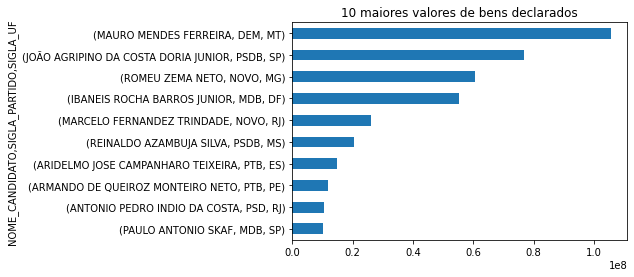

In [17]:
# Grafico com os 10 candidatos com maior valor em bens declarados do país
bens_candidatos = bens_candidatos_2018.groupby(["NOME_CANDIDATO", "SIGLA_PARTIDO", "SIGLA_UF"])["VALOR_BEM"].max().sort_values().tail(10).plot(kind='barh', title="10 maiores valores de bens declarados")


In [18]:
# Agrupa os bens declarados dos candidados por partido
avg_bens_candidatos_2018 = bens_candidatos_2018.groupby(["SIGLA_PARTIDO"])["VALOR_BEM"].agg('mean')


In [19]:
# Média de bens declarados por partido nas eleições de 2018 em ordem decrescente
avg_bens_candidatos_2018.sort_values(ascending=False)


SIGLA_PARTIDO
NOVO            R$ 1918081,90
PSDB            R$ 1791893,17
PTB             R$ 1707705,18
DEM             R$ 1012407,15
MDB              R$ 589892,19
PROS             R$ 486337,85
PSD              R$ 349655,24
PR               R$ 289834,34
SOLIDARIEDADE    R$ 288859,19
PSB              R$ 264863,61
PHS              R$ 258047,84
PTC              R$ 210458,53
PRTB             R$ 209049,10
PODE             R$ 206125,68
PMB              R$ 170000,00
AVANTE           R$ 167800,00
PSOL             R$ 165574,99
PDT              R$ 153028,65
PCO              R$ 151285,71
PP               R$ 151015,09
PMN              R$ 145071,60
PSL              R$ 144350,78
PATRI            R$ 123919,15
REDE             R$ 113279,07
PT               R$ 108306,69
PV               R$ 107184,18
DC               R$ 101666,67
PC do B           R$ 85488,59
PSC               R$ 76660,54
PSTU              R$ 73855,70
PCB               R$ 67229,88
PRP               R$ 30424,57
Name: VALOR_BEM, dtype: fl

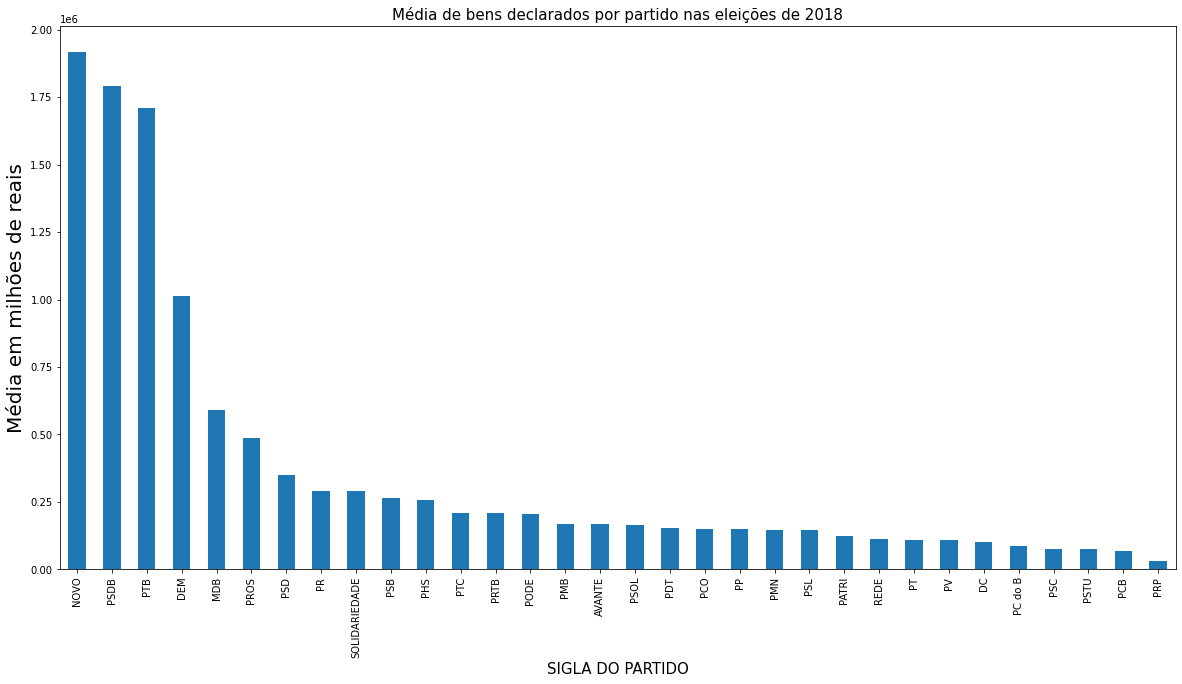

In [23]:
# Plota gráfico com bens declarados por partido nas eleições de 2018
avg_bens_candidatos_2018.sort_values(ascending=False).plot(kind='bar', figsize=(20, 10))
plt.title("Média de bens declarados por partido nas eleições de 2018", fontsize=15)
plt.xlabel("SIGLA DO PARTIDO", fontsize=15)
plt.ylabel("Média em milhões de reais", fontsize=20)
plt.show()


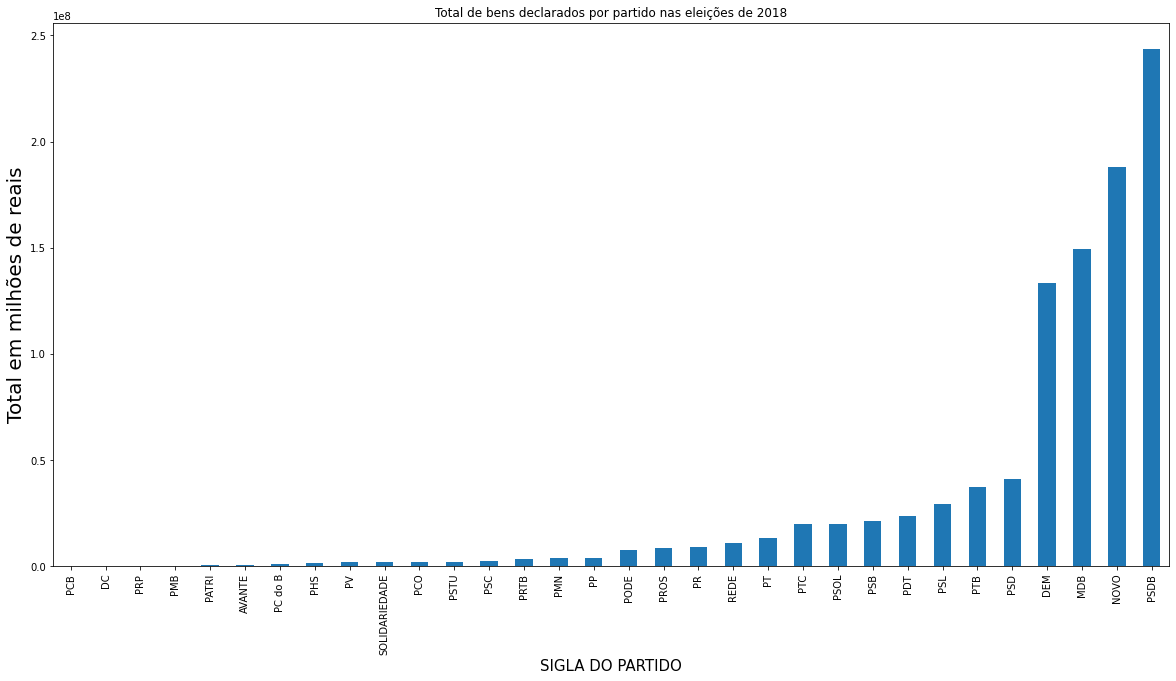

In [21]:
# Soma o valor total dos bens declarados dos candidatos de cada partido agrupados por partido
total_bens_candidatos_2018 = bens_candidatos_2018.groupby(["SIGLA_PARTIDO"])["VALOR_BEM"].sum()
total_bens_candidatos_2018.sort_values(ascending=False)


In [ ]:
# Gráfico com os valor total dos bens declarados pelos candidatos e agrupados por partido nas eleições de 2018
total_bens_candidatos_2018.sort_values(ascending=True).plot(kind='bar', figsize=(20, 10))
plt.title("Total de bens declarados por partido nas eleições de 2018", fontsize=15)
plt.xlabel("SIGLA DO PARTIDO", fontsize=15)
plt.ylabel("Total em milhões de reais", fontsize=20)
plt.show()
